# Historical Crude Oil Futures Prices (WTI & Brent)

In [67]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


| Variable | Descripción | Rol en el Análisis |
| :--- | :--- | :--- |
| `Date` | La fecha de negociación del contrato de futuros. | **Eje Temporal** |
| `Open` | Precio al inicio de la jornada de negociación. | Feature de Entrada |
| `High` | Precio más alto alcanzado durante el día. | Feature de Entrada |
| `Low` | Precio más bajo alcanzado durante el día. | Feature de Entrada |
| `Close` | Precio de cierre oficial del día. | **Variable Objetivo (Target)** |
| `Volume` | Cantidad total de contratos negociados. | Feature de Entrada (Actividad) |

Futuros (Futures) --> Es un acuerdo para comprar o vender una cantidad específica de petróleo en una fecha futura y a un precio pactado hoy.

In [68]:
brent_prices=pd.read_csv('brent_prices.csv')
brent_prices

,date,open,high,low,close,volume,average
0,2024-04-04,81.44,81.44,81.44,81.44,0.0,81.440
1,2024-04-05,81.60,81.60,81.53,81.53,3.0,81.600
2,2024-04-08,80.90,81.21,80.90,81.21,5.0,80.992
3,2024-04-09,80.81,80.81,80.65,80.67,20.0,80.689
4,2024-04-10,81.26,81.26,81.26,81.26,0.0,81.260
...,...,...,...,...,...,...,...
1835,2018-03-29,57.96,57.96,57.96,57.96,0.0,57.960
1836,2018-04-02,57.11,57.11,57.11,57.11,0.0,57.110
1837,2018-04-03,57.66,57.66,57.66,57.66,0.0,57.660
1838,2018-04-04,57.67,57.67,57.67,57.67,0.0,57.670


In [69]:
brent_prices.isnull().sum()

date       0
open       0
high       0
low        0
close      0
volume     0
average    0
dtype: int64

In [70]:
brent_prices['date']=pd.to_datetime(brent_prices['date'])
brent_prices

,date,open,high,low,close,volume,average
0,2024-04-04,81.44,81.44,81.44,81.44,0.0,81.440
1,2024-04-05,81.60,81.60,81.53,81.53,3.0,81.600
2,2024-04-08,80.90,81.21,80.90,81.21,5.0,80.992
3,2024-04-09,80.81,80.81,80.65,80.67,20.0,80.689
4,2024-04-10,81.26,81.26,81.26,81.26,0.0,81.260
...,...,...,...,...,...,...,...
1835,2018-03-29,57.96,57.96,57.96,57.96,0.0,57.960
1836,2018-04-02,57.11,57.11,57.11,57.11,0.0,57.110
1837,2018-04-03,57.66,57.66,57.66,57.66,0.0,57.660
1838,2018-04-04,57.67,57.67,57.67,57.67,0.0,57.670


In [71]:
brent_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1840 non-null   datetime64[ns]
 1   open     1840 non-null   float64       
 2   high     1840 non-null   float64       
 3   low      1840 non-null   float64       
 4   close    1840 non-null   float64       
 5   volume   1840 non-null   float64       
 6   average  1840 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.8 KB


<Axes: >

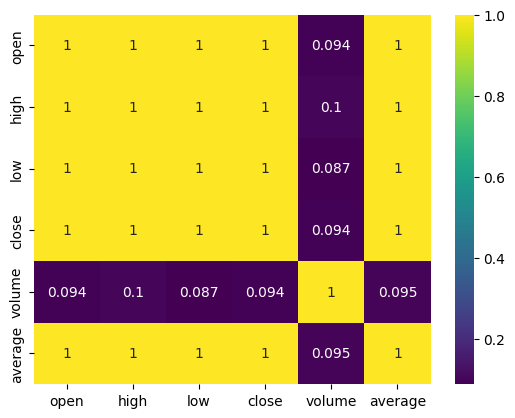

In [72]:
sns.heatmap(data=brent_prices.drop(columns=['date']).corr(), annot=True, cmap='viridis')

<Axes: >

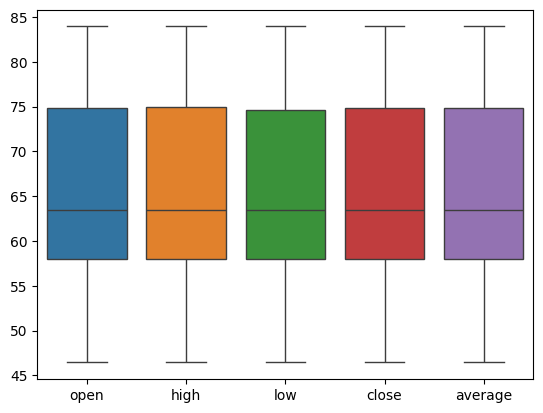

In [73]:
sns.boxplot(data=brent_prices.drop(columns=['volume', 'date']))

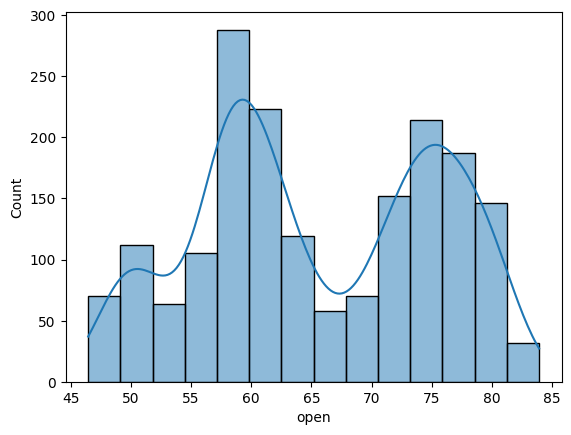

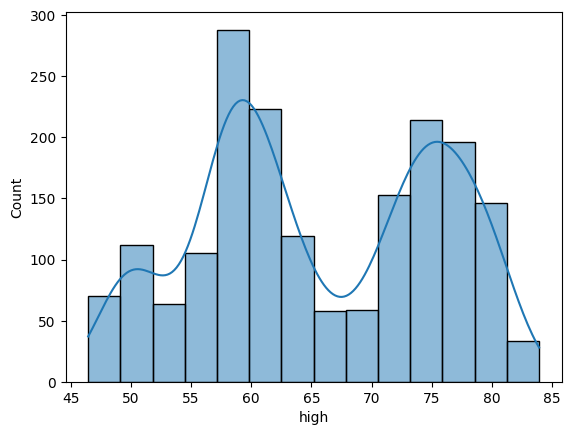

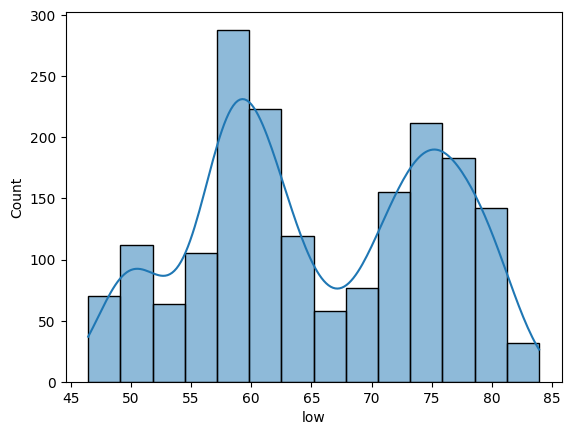

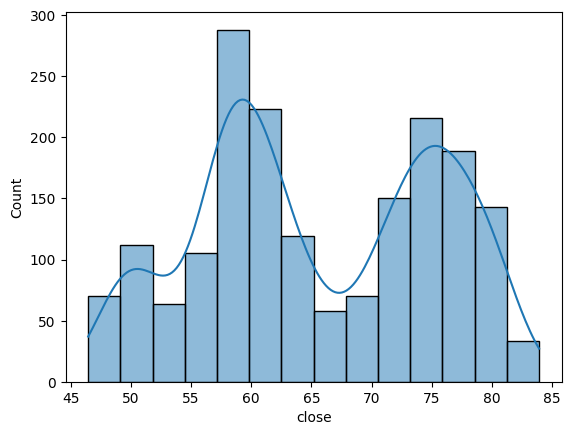

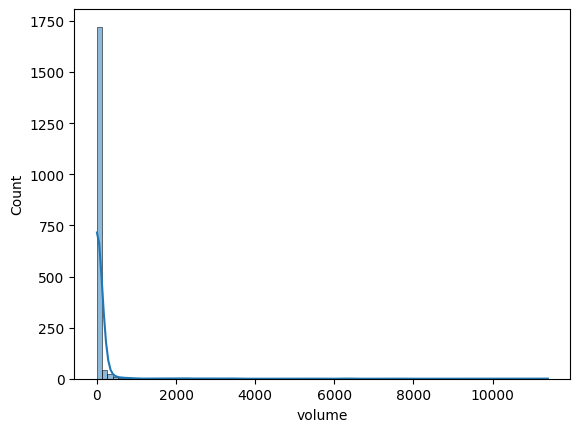

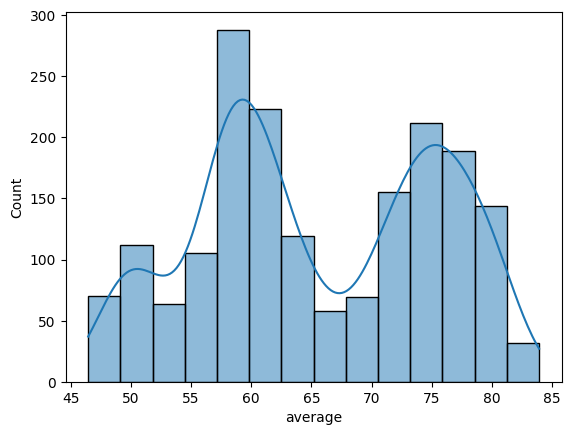

In [74]:
for i in brent_prices.drop(columns=['date']):
    sns.histplot(brent_prices[i], kde=True)
    plt.show()

Text(0.5, 1.0, 'Evolución del Precio de Cierre del Brent')

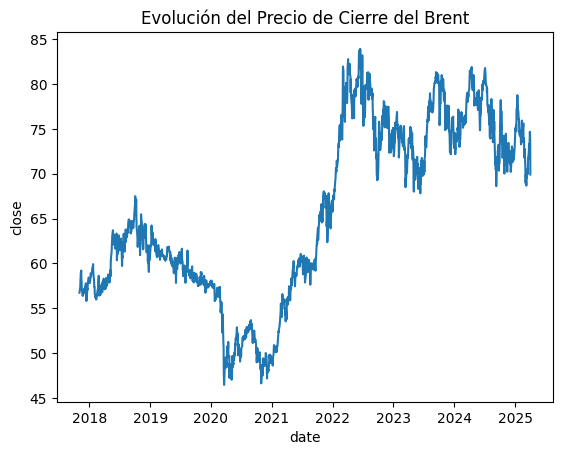

In [75]:
sns.lineplot(x=brent_prices['date'], y=brent_prices['close'], data=brent_prices)
plt.title('Evolución del Precio de Cierre del Brent')

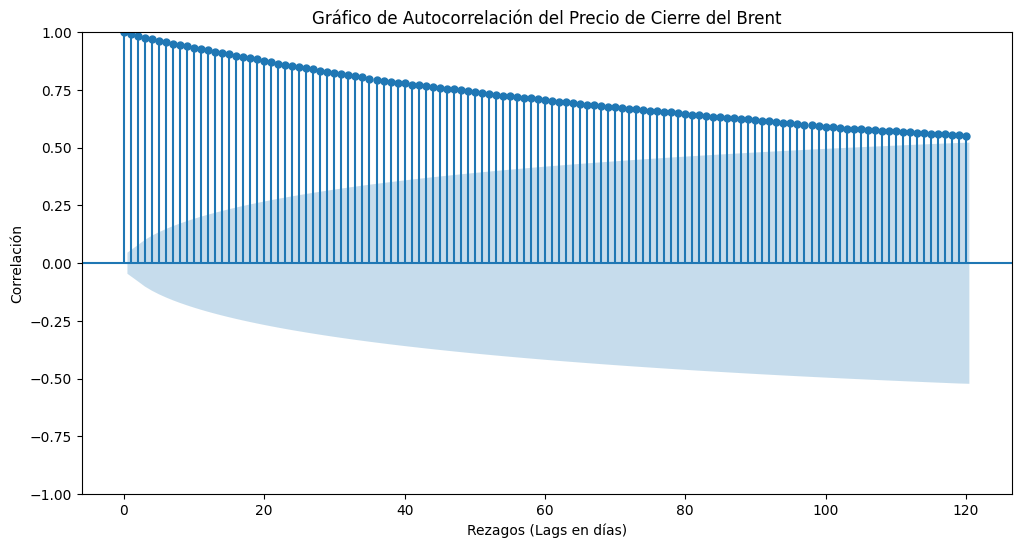

In [76]:
from statsmodels.graphics.tsaplots import plot_acf

# La fecha será el índice
brent_prices = brent_prices.set_index('date')

# Variable de interés
serie_de_precios = brent_prices['close'].dropna()

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Llama a la función plot_acf
plot_acf(serie_de_precios, lags=120, ax=ax)

plt.title('Gráfico de Autocorrelación del Precio de Cierre del Brent')
plt.xlabel('Rezagos (Lags en días)')
plt.ylabel('Correlación')
plt.show()

WTI (West Texas Intermediate)-->Es un tipo específico de petróleo crudo, considerado de muy alta calidad

In [77]:
wti_prices=pd.read_csv('wti_prices.csv')
wti_prices

,date,open,high,low,close,volume,average
0,2024-04-04,75.90,76.71,75.44,76.46,4467.0,76.149
1,2024-04-05,76.54,76.91,76.23,76.41,3429.0,76.552
2,2024-04-08,76.57,76.74,75.54,76.18,2276.0,76.070
3,2024-04-09,76.42,76.52,75.48,75.63,1811.0,75.900
4,2024-04-10,76.01,76.48,75.45,76.27,3500.0,76.077
...,...,...,...,...,...,...,...
2076,2017-03-30,54.95,54.95,54.95,54.95,0.0,54.950
2077,2017-03-31,55.44,55.44,55.44,55.44,0.0,55.440
2078,2017-04-03,55.83,55.83,55.83,55.83,0.0,55.830
2079,2017-04-04,56.18,56.18,56.18,56.18,0.0,56.180


In [78]:
wti_prices.isnull().sum()

date       0
open       0
high       0
low        0
close      0
volume     0
average    0
dtype: int64

<Axes: >

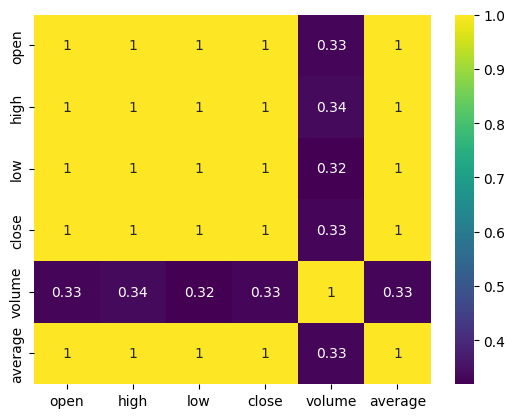

In [79]:
sns.heatmap(data=wti_prices.drop(columns=['date']).corr(), annot=True, cmap='viridis')

<Axes: >

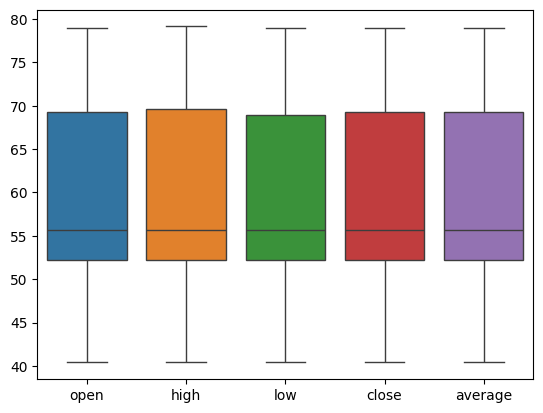

In [80]:
sns.boxplot(data=wti_prices.drop(columns=['volume', 'date']))

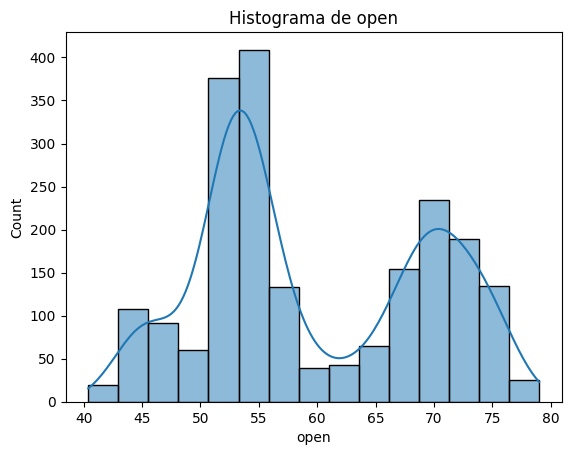

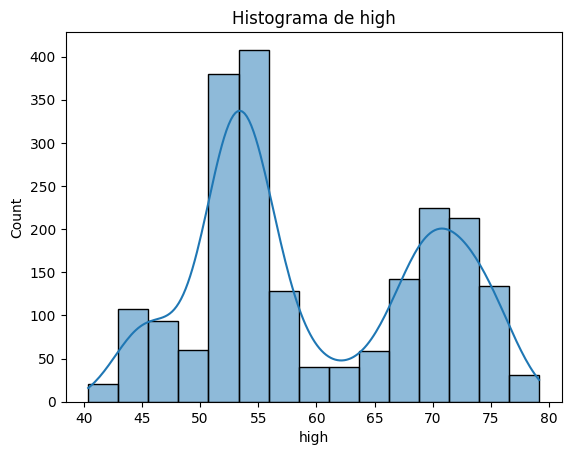

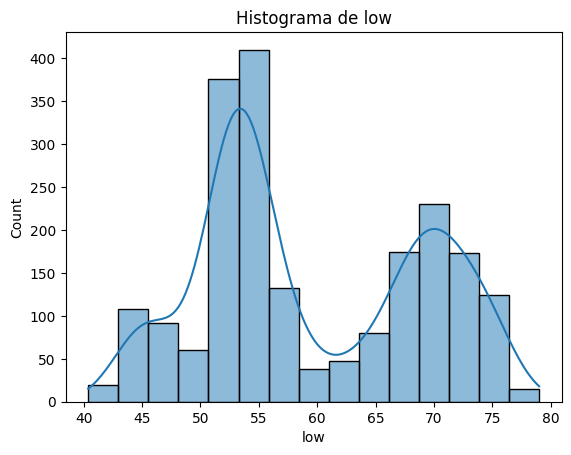

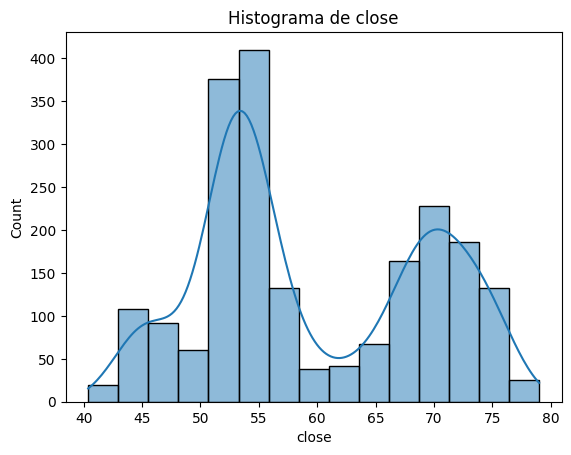

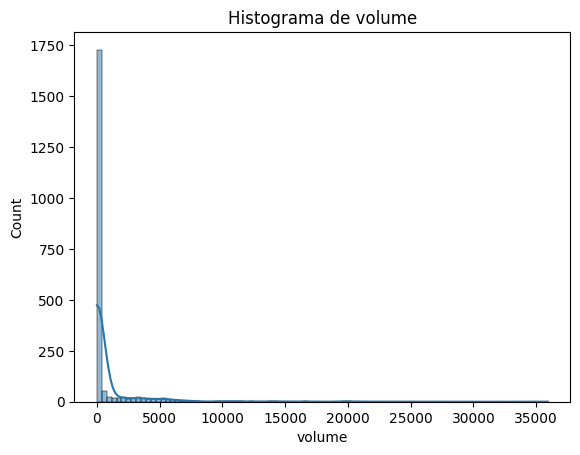

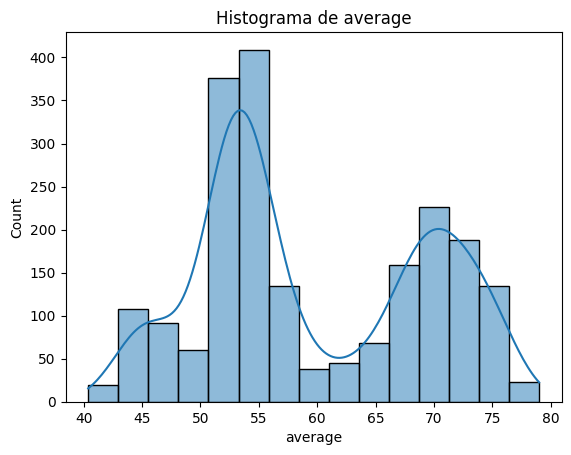

In [81]:
for i in wti_prices.drop(columns=['date']):
    sns.histplot(wti_prices[i], kde=True)
    plt.title(f'Histograma de {i}')
    plt.show()

Text(0.5, 1.0, 'Evolución del Precio de Cierre del WTI')

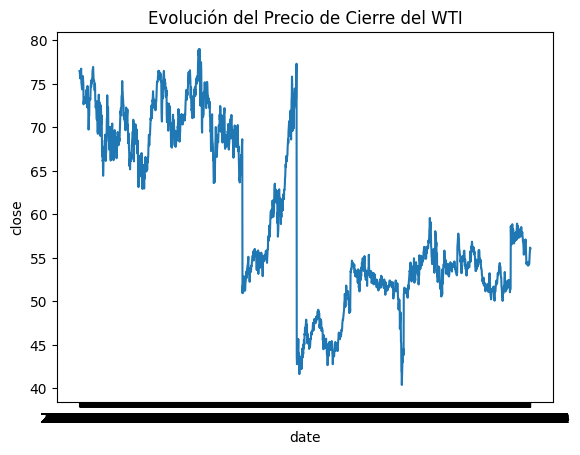

In [82]:
sns.lineplot(x=wti_prices['date'], y=wti_prices['close'], data=wti_prices)
plt.title('Evolución del Precio de Cierre del WTI')

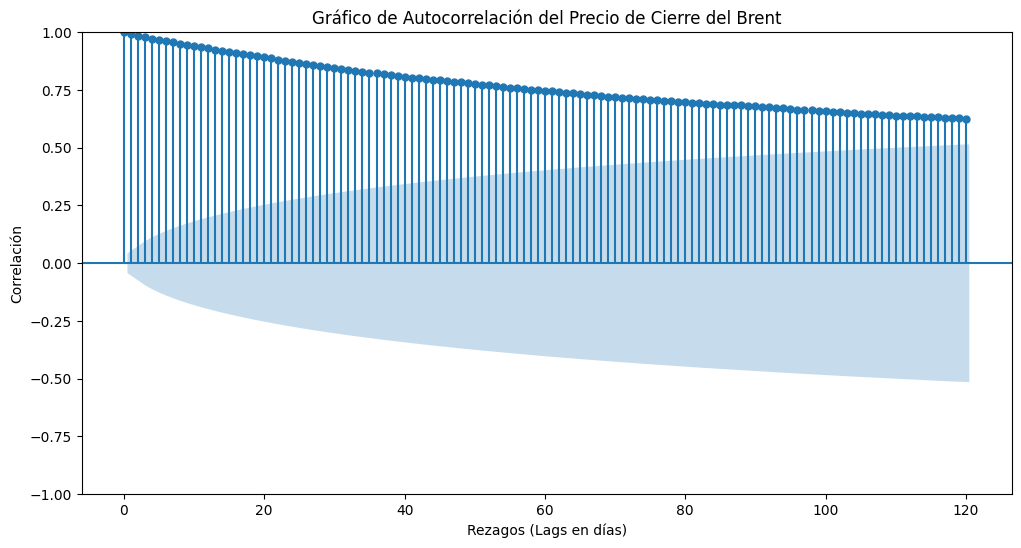

In [83]:
# La fecha será el índice
wti_prices = wti_prices.set_index('date')

# Variable de interés
serie_de_precios = wti_prices['close'].dropna()

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Llama a la función plot_acf
plot_acf(serie_de_precios, lags=120, ax=ax)

plt.title('Gráfico de Autocorrelación del Precio de Cierre del Brent')
plt.xlabel('Rezagos (Lags en días)')
plt.ylabel('Correlación')
plt.show()